In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston


In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [51]:
boston.target.all() == bos[10].all()  ## matching with the target column

True

In [3]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos[1].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: 1, dtype: int64

In [6]:
bos[3].value_counts()

0.0    471
1.0     35
Name: 3, dtype: int64

In [7]:
bos.shape

(506, 13)

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
bos.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [10]:
bos.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

No nan values are present in our data.

In [11]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


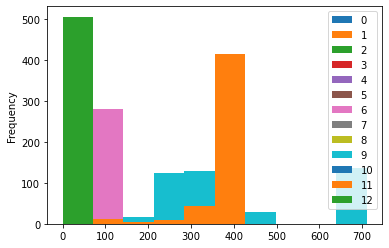

In [12]:
bos.plot(kind='hist')

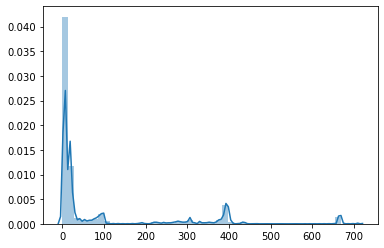

In [14]:
import seaborn as sns
sns.distplot(bos)

/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


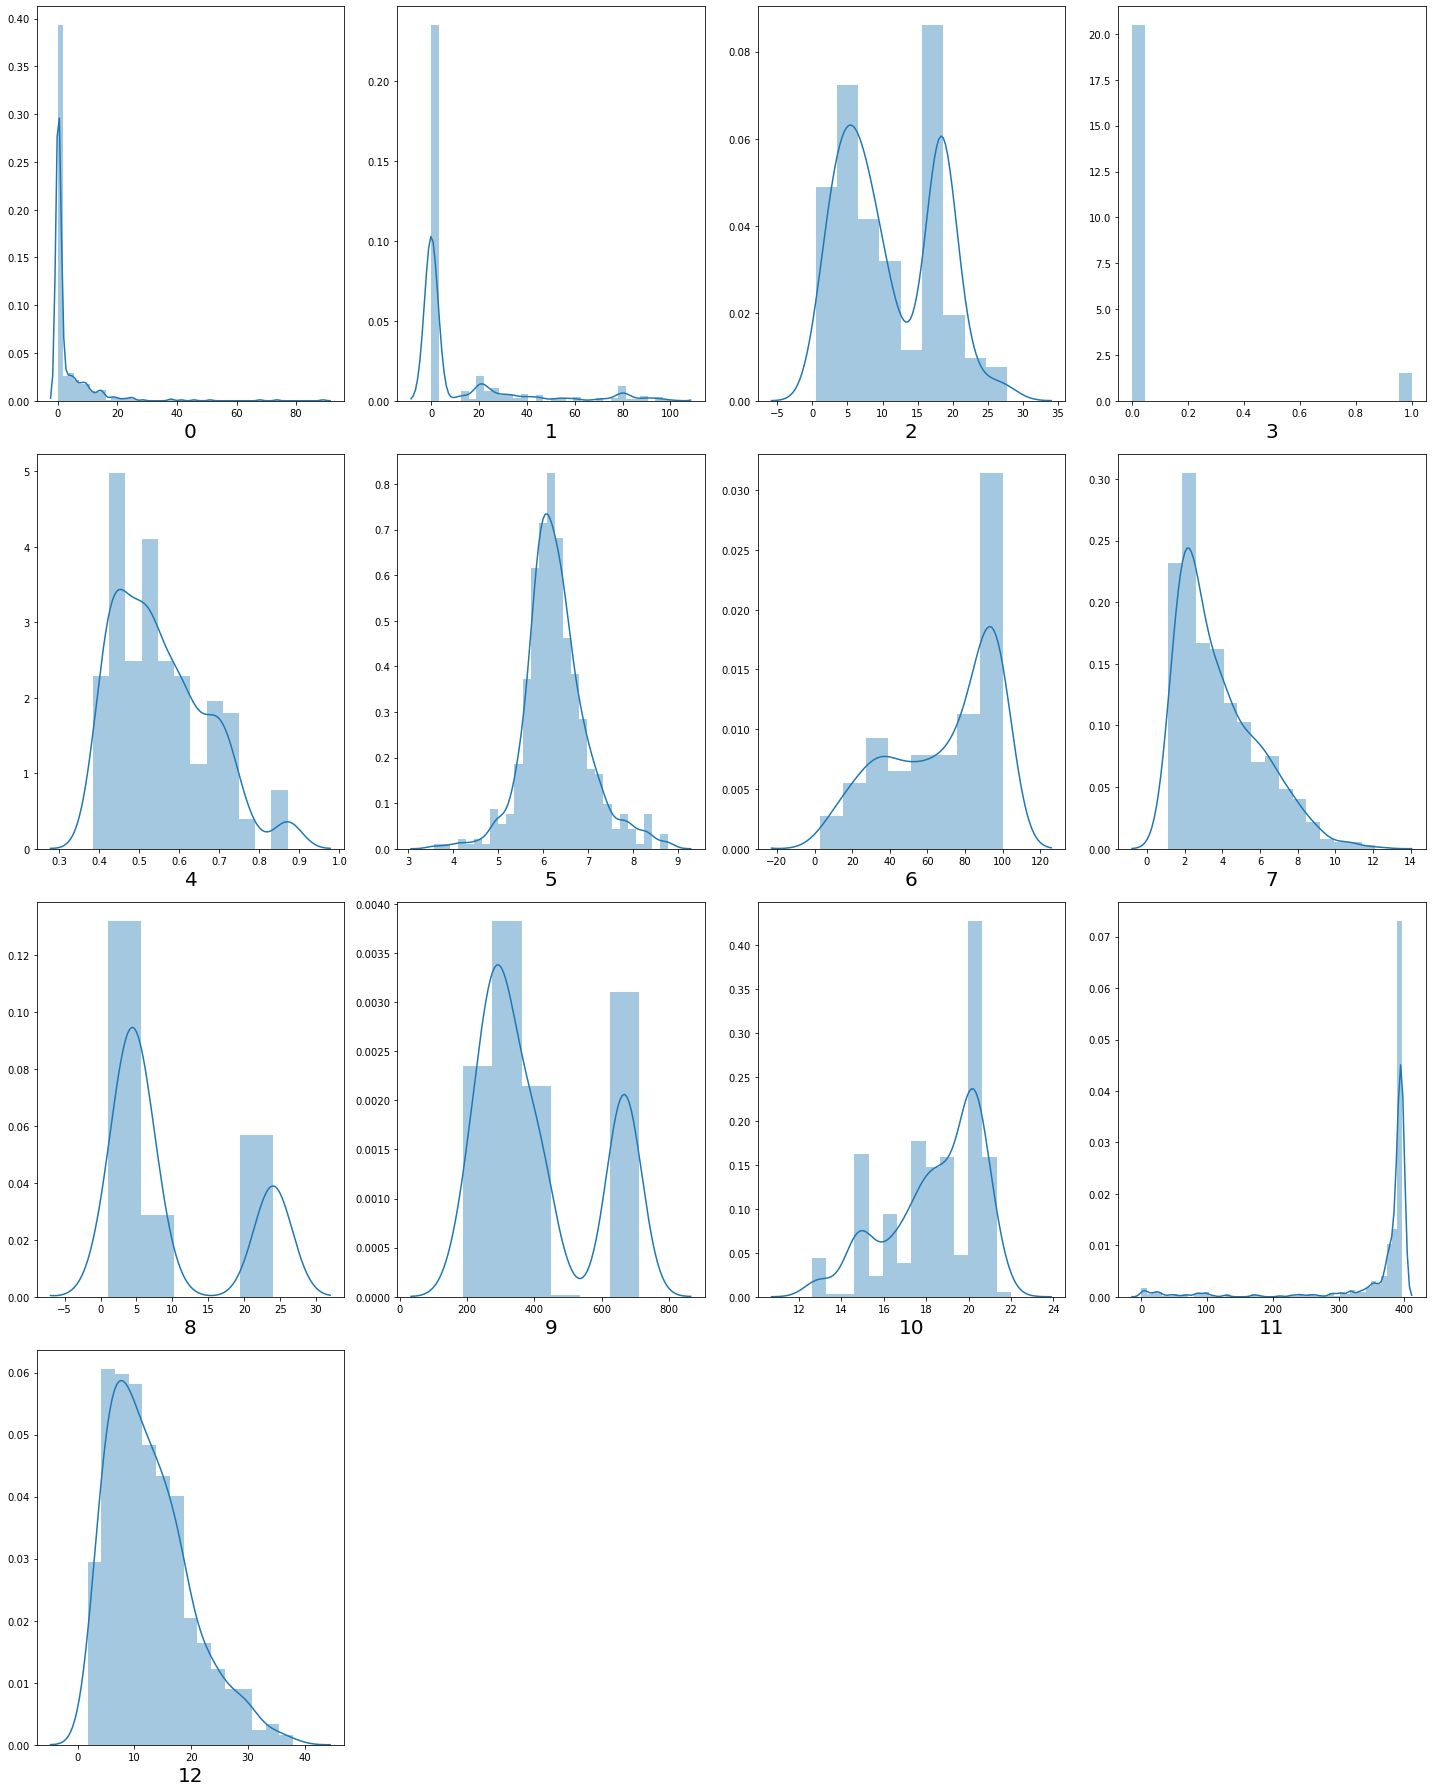

In [78]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('dist',fontsize=20)
    plotnumber+=1
plt.tight_layout()

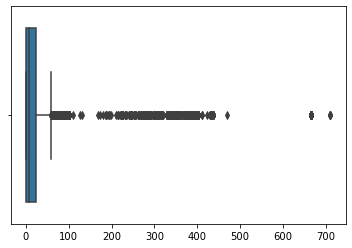

In [76]:
sns.boxplot(bos)

We do have outliers.We need to first tackle these and than will go for model building.

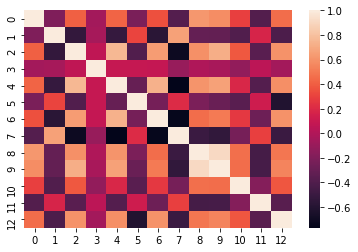

In [75]:
sns.heatmap(bos.corr(), annot = False)

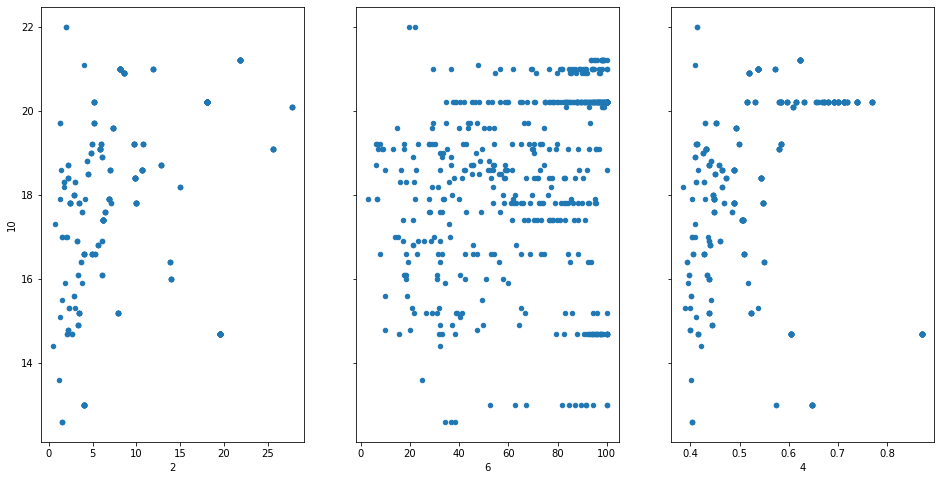

In [87]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
bos.plot(kind='scatter', x=2, y=10, ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x=6, y=10, ax=axs[1])
bos.plot(kind='scatter', x=4, y=10, ax=axs[2])

In [52]:
y = bos[10]
x = bos.drop(10)

In [53]:
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(x[:450], y[:450])

LinearRegression()

In [85]:
# print intercept and coefficients
print(lgr.intercept_)
print(lgr.coef_)

1.8261764041730615
[ 2.20375741e-04 -1.84772049e-03  6.00872522e-03  7.70887207e-02
 -5.00631886e-01  6.55606395e-02 -2.75340457e-04  1.83393633e-03
  1.24271903e-02  2.67361323e-04  8.64606180e-01  3.61401360e-04
  9.88709387e-03]


In [54]:
y_pred = lgr.predict(x[450:])

In [99]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [56]:
mse = mean_squared_error(y_pred, y[451:])

In [57]:
mse

0.03284843501465864

In [70]:
rs = r2_score(y_pred,y[451:])

In [71]:
rs

0.8284387187586216

In [100]:
mae = mean_absolute_error(y_pred, y[451:])

In [101]:
mae

0.11910983276023486

In [103]:
lgr.score(x[:450],y[:450])

0.8165137632239